# 7. About important CV models and their Techniques

### About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.1 (06/07/2023)

**Requirements:**
- Python 3 (tested on v3.11.4)
- Torch (tested on v2.0.1+cu118)
- Torchvision (tested on v0.15.2+cu118)

### Imports and CUDA

In [1]:
# Torch
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import datasets
import torch.optim as optim
from torchvision.transforms import ToTensor, Compose, Normalize
from torchvision.datasets import MNIST
import torch.nn.functional as F
import torch.nn as nn

In [2]:
# Use GPU if available, else use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### A list of milestone computer vision models

Check: https://github.com/gmalivenko/awesome-computer-vision-models

### AlexNet

AlexNet competed in the "ImageNet Large Scale Visual Recognition Challenge" on September 30, 2012. It was trained on the ImageNet dataset, an image classification dataset consisting of $ 256 \times 256 $ images (used as inputs), with 1000 classes (used as outputs).

AlexNet consists of a CNN model, similar to the one in Week4, Notebook 5. It was one of the first architectures to combine Conv2d layers with Dropout, Pooling and ReLU layers.

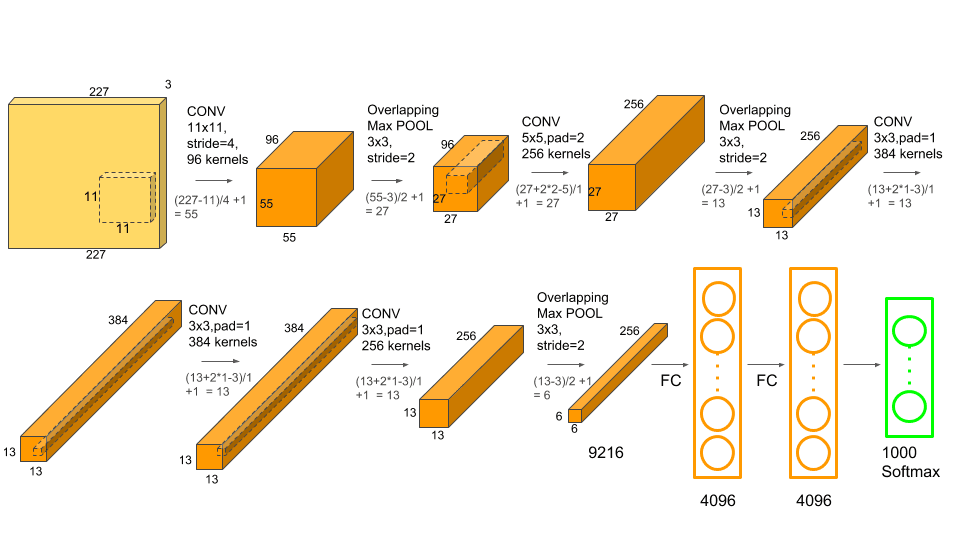

However, its main innovation at the time was the sheer number of layers and trainable parameters, and how the model had been trained on GPUs instead of a CPU to improve the computational performance of the training process.

The pre-trained model, with parameters defined as in 2012, can be loaded directly from PyTorch, as shown below.

In [3]:
model = torchvision.models.alexnet(weights = 'DEFAULT', progress = True)
model.eval()
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### VGG Models

In 2014, a new model became popular and state-of-the-art for image classification, the VGG model. VGG was based off of AlexNet, but it has several differences that separated it from other models:

- Instead of using large receptive fields like AlexNet (i.e. 11x11 kernels with a stride of 4), VGG uses smaller receptive fields (i.e. 3x3 kernels with a stride of 1). It also uses three ReLU units instead of just one. For this reason, the decision function is more discriminative.
- As a consequence, it has fewer parameters: 27 times the number of channels instead of AlexNet’s 49 times the number of channels.
- VGG incorporates 1x1 convolutional layers to make the decision function more non-linear without changing the receptive fields.
- The small-size convolution filters allow VGG to have a larger number of weight layers. These additional layers lead to improved performance. This is not an uncommon feature, though. GoogLeNet, another model that uses deep CNNs and small convolution filters, was also showed up in the 2014 ImageNet competition.

A diagram of the model is shown below.

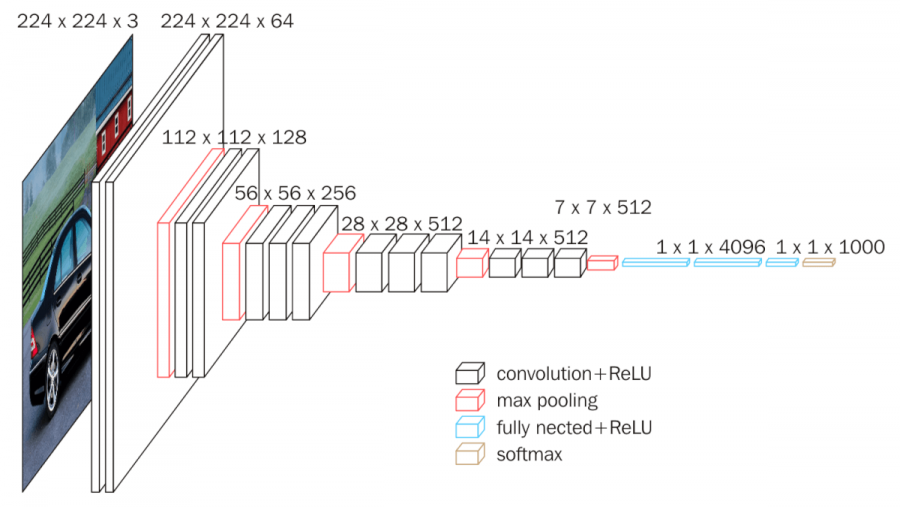

The pre-trained model can be loaded directly from PyTorch, as shown below.

In [4]:
model = torchvision.models.vgg19(weights = 'DEFAULT', progress = True)
model.eval()
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

### Resnet models

A residual neural network (ResNet) is a very deep feedforward neural network with hundreds of layers, much deeper than previous AlexNet and VGG neural networks. Its main innovations are the skip connections (or residuals or shortcuts), which are used to jump over some layers.

Typical ResNet models are implemented with double- or triple- layer skips that contain nonlinearities (ReLU) and batch normalization in between, as shown below.

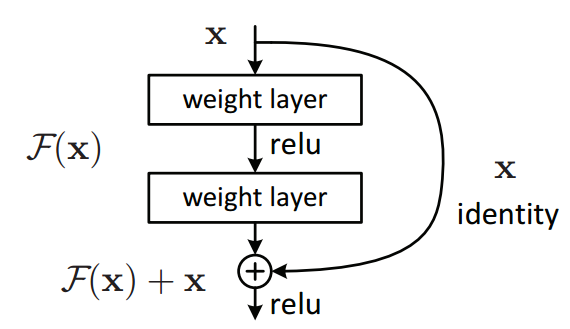

Skip connections are great for two main reasons:
- First, it helps to avoid the problem of vanishing gradients. Indeed, when a large number of successive layers is used, the chain rule leads to a large product of many small gradients, which might eventually end up being close to zero. This makes the first layer difficult to update using gradient descent.

Skip connections are therefore mechanisms that facilitate information flow across many layers.

- Second, it helps to mitigate the Degradation (or accuracy saturation) problem, where adding more layers to a suitably deep model leads to higher training error. 

Skipping effectively simplifies the network, using fewer layers in the initial training stages. This speeds learning by reducing the impact of vanishing gradients, as there are fewer layers to propagate through. The network then gradually restores the skipped layers as it learns the feature space. Eventually, this allows to train VERY large models (Resnet has 152 layers!) compared to the previous AlexNet and VGG models (the latter had up to 19 layers only!).

A resnet model, shown below, was used to win the ImageNet 2015 competition, and has become the most cited neural network of the 21st century.

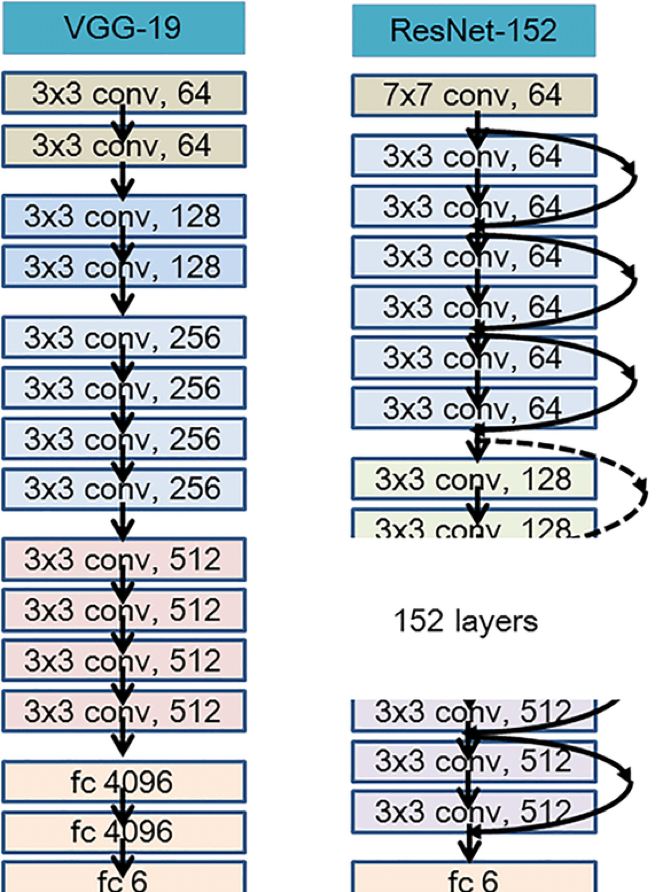

The pre-trained model can be loaded directly from PyTorch, as shown below.

In [5]:
model = torchvision.models.resnet152(weights = 'DEFAULT', progress = True)
model.eval()
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Implementing a residual connection in a DNN's forward method

A residual is simply implemented in the forward method of a Residual block, as shown in the custom class below. Pay attention to the line below, and notice how we add the input x to the output of the second Conv block (but not the first one).

```
out = F.relu(self.conv2(out)) + x
```

In [6]:
class ResidualBlock(nn.Module):
    def __init__(self, n):
        super(ResidualBlock, self).__init__()
        
        # Conv layers
        self.conv1 = nn.Conv2d(n, n, 1)
        self.conv2 = nn.Conv2d(n, n, 3, 1, 1)
        
        # Final linear layer
        self.classifier = nn.Linear(n*24*24, 751)

    def forward(self, x):
        # First Conv block (Conv2d + ReLU), no residual.
        out = F.relu(self.conv1(x))
        
        # Second Conv block, add input x as residual.
        out = F.relu(self.conv2(out)) + x
        
        # Resize
        out = out.view(out.size(0),-1)
        
        # Final layer
        out = self.classifier(out)
        return out

### Densenet models

A DenseNet is a type of convolutional neural network that utilises dense connections between layers, through Dense Blocks, where we connect all layers (with matching feature-map sizes) directly with each other, as in ResNet. In Layman terms, a DenseNet is a Resnet, where all possible shortcuts have been drawn in every ResidualBlock.

To preserve the feed-forward nature, each layer obtains additional inputs from all preceding layers and passes on its own feature-maps to all subsequent layers.

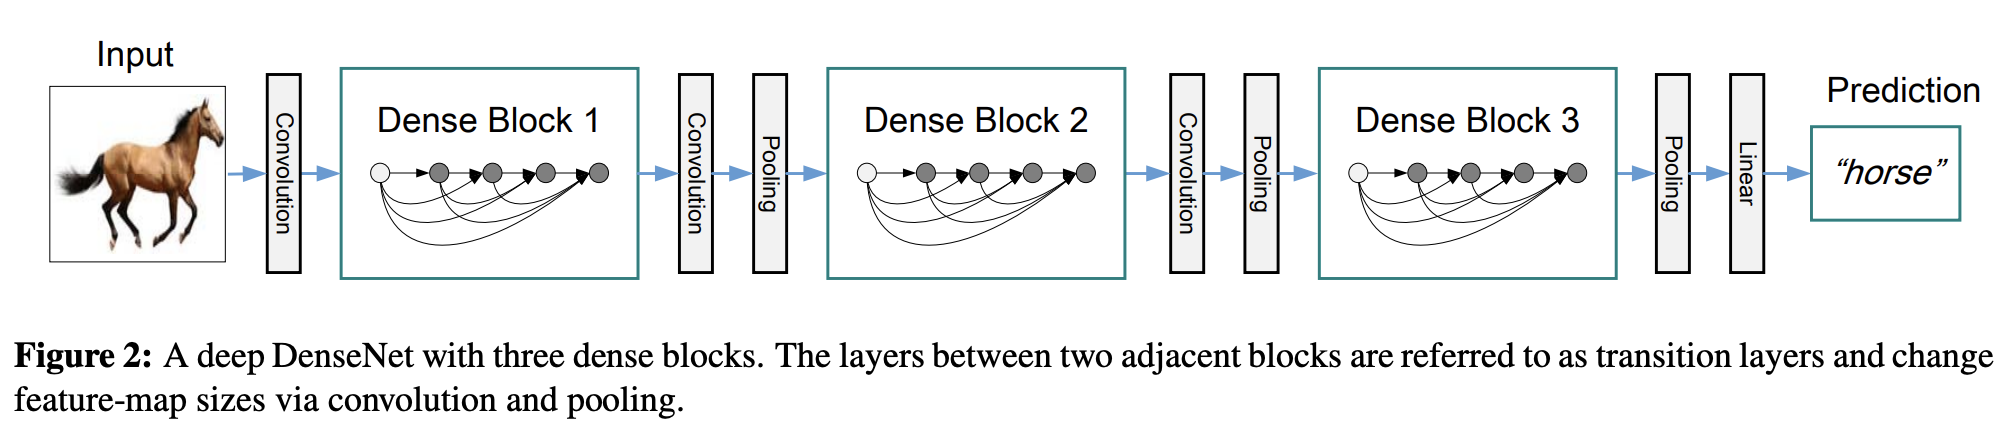

The pre-trained model can be loaded directly from PyTorch, as shown below.

In [7]:
model = torchvision.models.densenet201(weights = 'DEFAULT', progress = True)
model.eval()
print(model)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

### Inception models

Inception models were created to address the following problem: salient parts in the image sometimes have large variations in size. For instance, an image with a dog can be either of the ones shown below. The area occupied by the dog is different in each image, which might make learning difficult for networks.

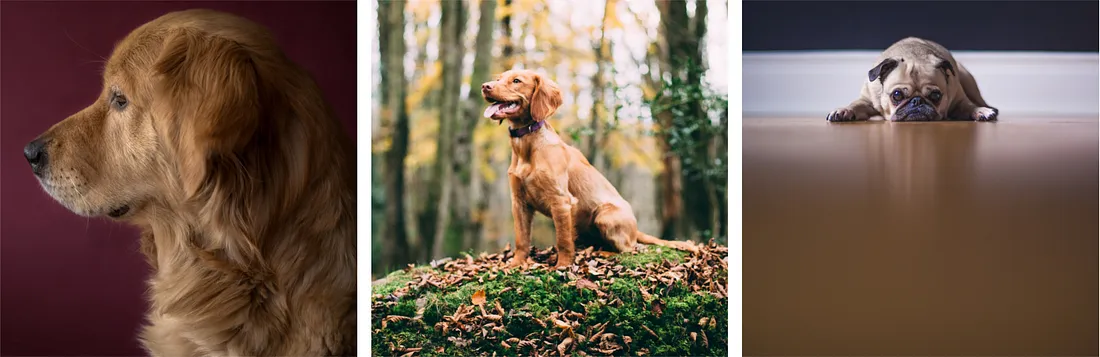

Because of this, choosing the right kernel size for the convolution operation becomes tough. A larger kernel is preferred for information that is distributed more globally (e.g. a zoomed-in picture), and a smaller kernel is preferred for information that is distributed more locally (e.g. a zoomed-out picture).

However, we have seen that very deep networks are prone to overfitting. It is also hard to pass gradient updates through the entire network. Finally, naively stacking large convolution operations is computationally expensive.

To address this problem, Inception proposes to use multiple Convolution filters, with different sizes, in parallel.

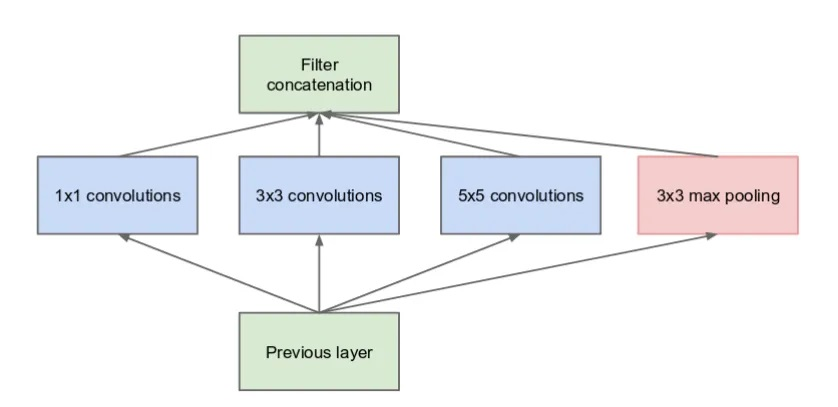

These Inception blocks are then stacked into a large model, called an Inception model.

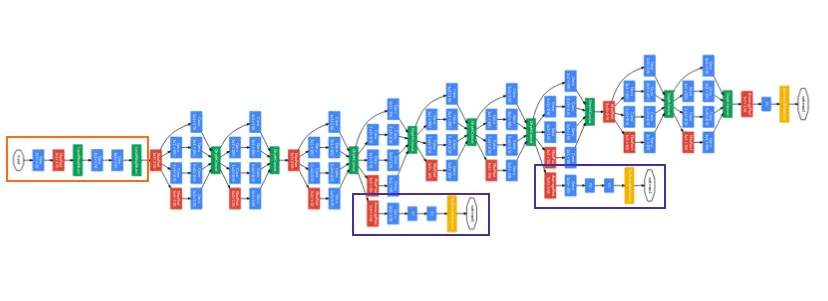

The pre-trained model can be loaded directly from PyTorch, as shown below.

In [8]:
model = torchvision.models.inception_v3(weights = 'DEFAULT', progress = True)
model.eval()
print(model)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

### EfficientNet models

The innovation behind EfficientNet is the scaling method that uniformly scales all dimensions of depth/width/resolution using a compound coefficient.

Unlike conventional practice that arbitrary decides these factors, the EfficientNet scaling method uniformly scales network width, depth, and resolution with a set of fixed scaling coefficients. For example, if we want to use more computational resources, then we can simply increase the network depth, width, and image size by a given factor. These coefficients are determined by a small grid search on the original small model.

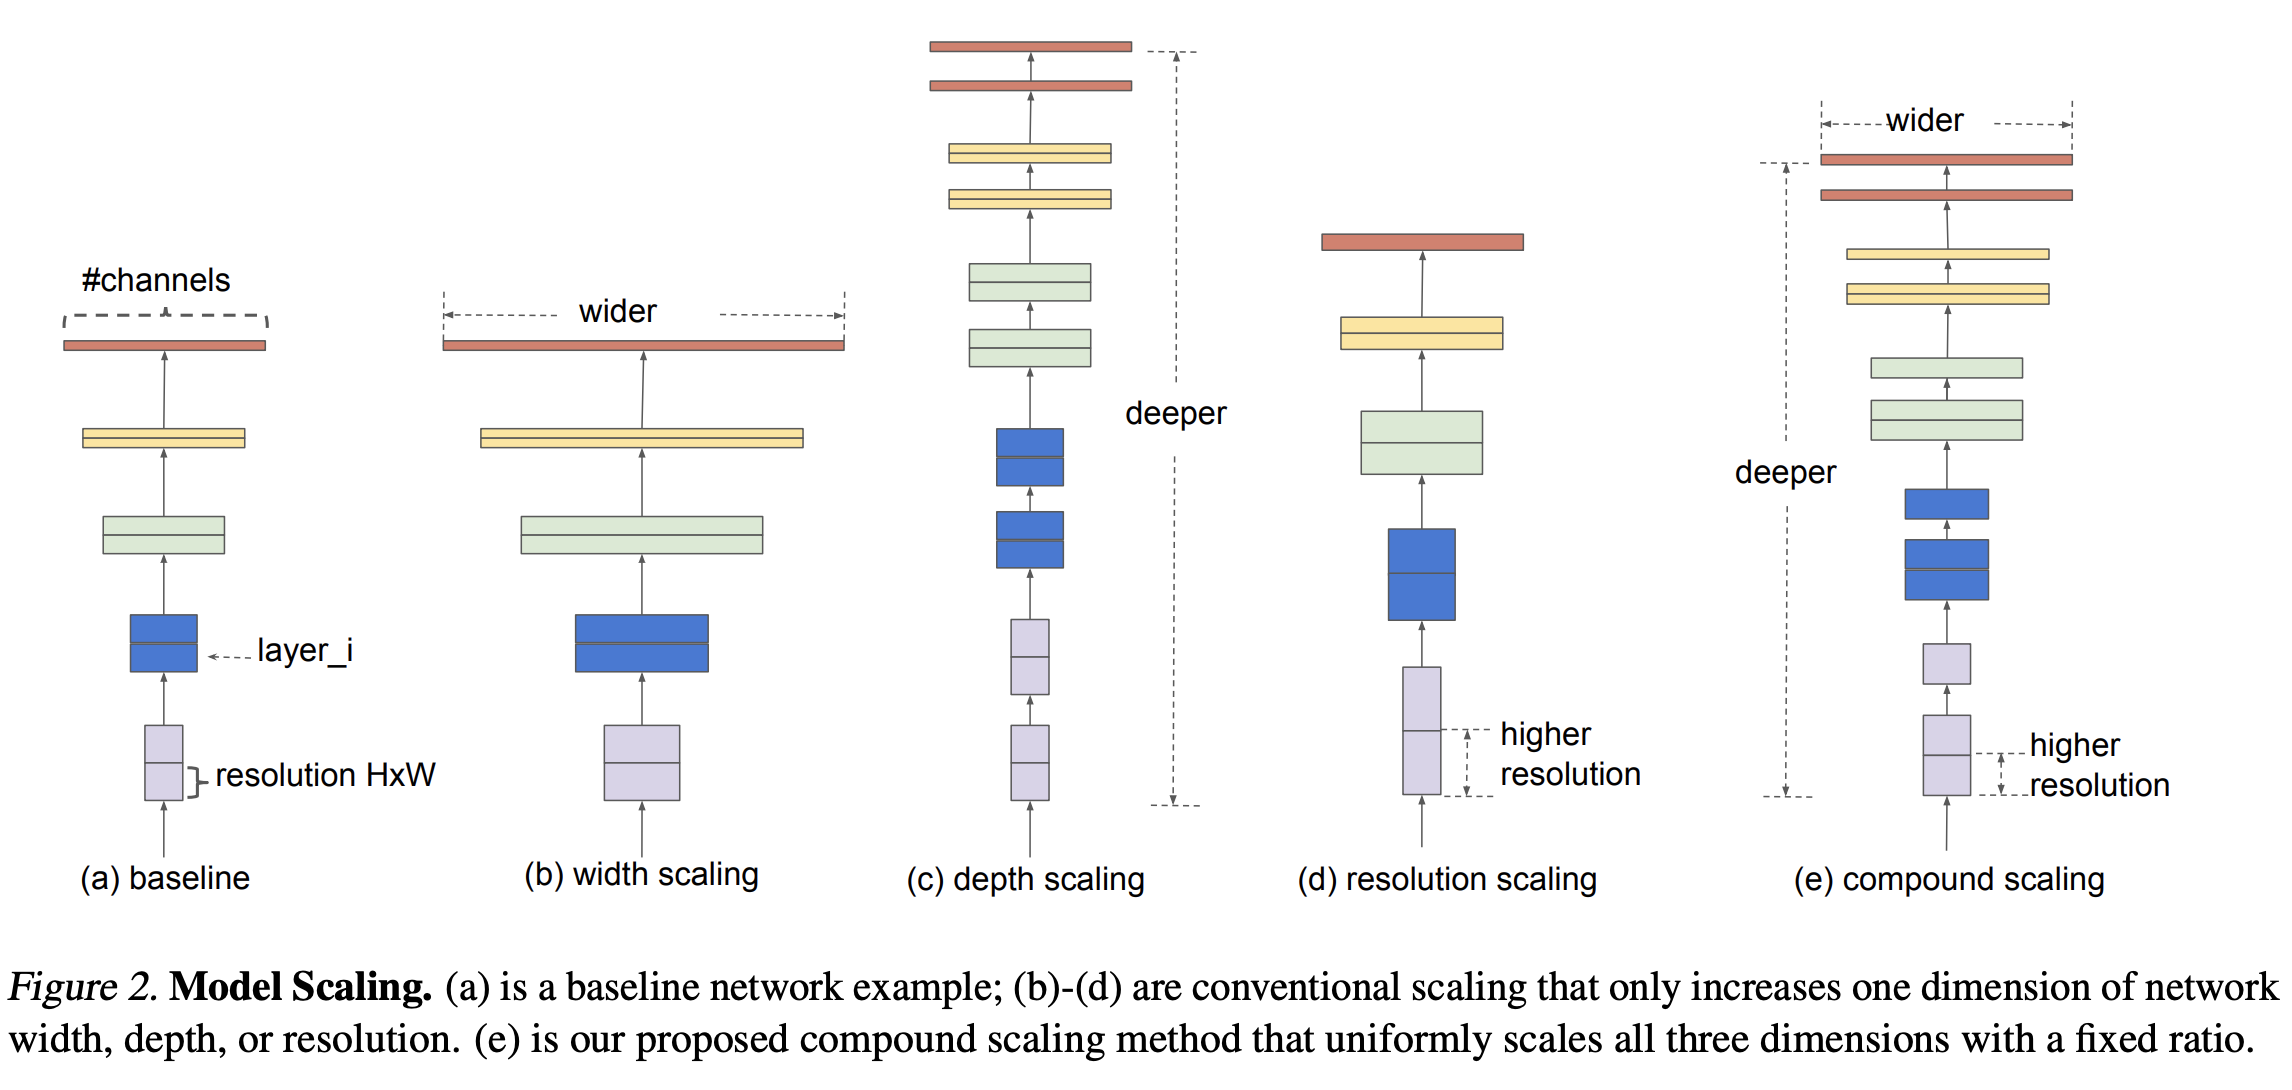

The compound scaling method is justified by the intuition that if the input image is bigger, then the network needs more layers to increase the receptive field and more channels to capture more fine-grained patterns on the bigger image. Different sizes for the pre-trained model exist, ranging from b0 (smaller) to b7 (larger).

In [9]:
model = torchvision.models.efficientnet_b0(weights = 'DEFAULT', progress = True)
model.eval()
print(model)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

)


### What's next?

There are many more models that have marked the history of computer vision, but we have only covered the most famous ones. These days, however, these models are no longer considered best performance state-of-the-art. Some of these models, e.g. Inception, have even gone through many variations (Inception v1 was released in 2014, Inception v4 in 2016).

We invite the SUTD students interested in learning more about Computer Vision to enroll in the Term 7 course, 50.035 Computer Vision (https://istd.sutd.edu.sg/undergraduate/courses/50035-computer-vision).

Feel free to have a look at: https://github.com/gmalivenko/awesome-computer-vision-models

In the next notebook, we will investigate how to reuse these pre-trained networks, for other tasks, which is commonly refered to as **transfer learning**.